In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sys.path.append(dirname('../src'))
from src.utils import utils
data = utils.load_df("../Data/feature_eng.pkl")
data.head(5)

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,label,ANALGESICOS_OPIOIDES___,num_ANALGESICOS_OPIOIDES___,avg_ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,num_g1_ANALGESICOS,avg_g1_ANALGESICOS,g2_ANESTESIA,num_g2_ANESTESIA,avg_g2_ANESTESIA
0,AADV5603014KS44QC1,1,M,25,12.5,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,AADV5603014KS44QC1,2,M,23,11.5,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,AADV5603014KS44QC1,3,M,21,10.5,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
3,AADV5603014KS44QC1,4,M,20,10,1,1999,NaN,NaN,0,...,1,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,AEDJ750301XGAEGRC1,1,M,4,2,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


<AxesSubplot:>

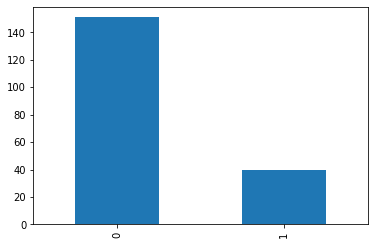

In [3]:
data['label'].value_counts().plot.bar()

In [4]:
data[data['sum_num_consultas']==0]

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,label,ANALGESICOS_OPIOIDES___,num_ANALGESICOS_OPIOIDES___,avg_ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,num_g1_ANALGESICOS,avg_g1_ANALGESICOS,g2_ANESTESIA,num_g2_ANESTESIA,avg_g2_ANESTESIA
6,AEDJ750301XGAEGRC1,3,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
27,COPI690401V91QCRC2,5,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
28,COPI690401V91QCRC2,6,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
29,COPI690401V91QCRC2,7,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
62,GAMP640301UJL5SEE1,7,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
63,GAMP640301UJL5SEE1,8,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
76,GUSJ5712286XUN73A2,2,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
77,GUSJ5712286XUN73A2,3,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
78,GUSJ5712286XUN73A2,4,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
79,GUSJ5712286XUN73A2,5,,0,0,0,NaN,NaN,NaN,0,...,1,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


- Eliminando filas que no aportan información

In [5]:
data = data[data['sum_num_consultas']>0]
data = data.reset_index()
data = data.drop(columns=['index'])
data

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,label,ANALGESICOS_OPIOIDES___,num_ANALGESICOS_OPIOIDES___,avg_ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,num_g1_ANALGESICOS,avg_g1_ANALGESICOS,g2_ANESTESIA,num_g2_ANESTESIA,avg_g2_ANESTESIA
0,AADV5603014KS44QC1,1,M,25,12.5,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,AADV5603014KS44QC1,2,M,23,11.5,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,AADV5603014KS44QC1,3,M,21,10.5,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
3,AADV5603014KS44QC1,4,M,20,10,1,1999,NaN,NaN,0,...,1,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,AEDJ750301XGAEGRC1,1,M,4,2,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,ZAGM6412151ICF4PC4,2,F,15,7.5,1,2013,1.29919,0.733333,0,...,1,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
162,ZEPL5503219FZQ6QC2,1,F,10,5,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
163,ZEPL5503219FZQ6QC2,2,F,5,2.5,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
164,ZEPL5503219FZQ6QC2,3,F,6,3,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


<AxesSubplot:>

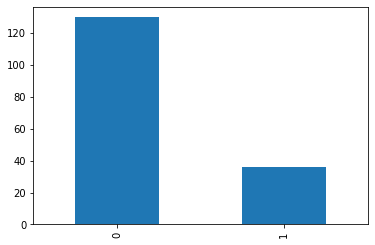

In [6]:
data['label'].value_counts().plot.bar()

- Eliminando columnas que no aportan información

In [7]:
subset_df = data.loc[:, data.isnull().all()]
col_null = list(subset_df.columns)
col_null

['año_dx_hta',
 'hta_años_flt',
 'hta_años_int',
 'num_med_ldl',
 'avg_ldl',
 'min_ldl',
 'max_ldl',
 'num_med_plaquetas',
 'avg_plaquetas',
 'min_plaquetas',
 'max_plaquetas',
 'num_med_tuberculosis',
 'avg_tuberculosis',
 'num_med_ot_enf_bacterianas',
 'avg_ot_enf_bacterianas',
 'num_med_inf_trans_pred_sexual',
 'avg_inf_trans_pred_sexual',
 'num_med_rickettsiosis_y_ot_enf__protozoarios',
 'avg_rickettsiosis_y_ot_enf__protozoarios',
 'num_med_tumores_malig_labio_bucal_faringe',
 'avg_tumores_malig_labio_bucal_faringe',
 'num_med_tumores_malig_organos',
 'avg_tumores_malig_organos',
 'num_med_tumores_malig_org_genitourinarios',
 'avg_tumores_malig_org_genitourinarios',
 'num_med_tumores_malig_otros_sitios_ne',
 'avg_tumores_malig_otros_sitios_ne',
 'num_med_tumores_malig_tejido_linf_org_hematop',
 'avg_tumores_malig_tejido_linf_org_hematop',
 'num_med_tumores_comp_incierto_desc',
 'avg_tumores_comp_incierto_desc',
 'num_med_enf_sangre_org_hematop',
 'avg_enf_sangre_org_hematop',
 'num

In [8]:
data.drop(col_null, axis=1, inplace=True)
list(data.columns)

['cx_curp',
 'ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'año_dx_dm',
 'dm_años_flt',
 'dm_años_int',
 'hta',
 'renal',
 'renal_años_flt',
 'renal_años_int',
 'edad_range',
 'epoca_nac',
 'imc_range',
 'num_med',
 'avg_num_med',
 'min_num_med',
 'max_num_med',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 'max_diastolica_a',
 'hba1c',
 'num_med_hba1c',
 'avg_hba1c',
 'min_hba1c',
 'max_hba1c',

In [9]:
display(data[['imc_range']])
data = data.loc[:,~data.columns.duplicated()].copy()
data[['imc_range']]

,imc_range
0,4
1,4
2,4
3,4
4,4
...,...
161,3
162,2
163,3
164,3


,imc_range
0,4
1,4
2,4
3,4
4,4
...,...
161,3
162,2
163,3
164,3


In [10]:
data.shape

(166, 628)

In [11]:
data['imc_range'].unique()

array([4, 3, 2, 1, nan], dtype=object)

In [12]:
data[pd.isna(data['imc_range'])]

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA
120,PAGJ690411WZ0YDRC1,3,M,1,0.5,1,2007,3.97057,3,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
121,PAGJ690411WZ0YDRC1,4,M,1,0.5,1,2007,3.97057,3,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0


In [13]:
data[data['cx_curp']=='PAGJ690411WZ0YDRC1'][['ventana','imc_range']]

,ventana,imc_range
119,1,4
120,3,NaN
121,4,NaN
122,12,3


In [14]:
#data['imc_range'] = data['imc_range'].fillna('Sin dato')
#data['sexo'] = data['sexo'].fillna('Sin dato')
data.loc[(data['sexo'] == 'M'), 'sexo'] = 1
data.loc[(data['sexo'] == 'F'), 'sexo'] = 2

In [15]:
data['sexo'].unique()

array([1, 2], dtype=object)

In [16]:
#df_st = data[['sexo','imc_range']]
#display(df_st.head(5))
#df1 = data.drop(['sexo','imc_range'], axis=1)
#display(df1.head(5))

In [17]:
data[pd.isna(data['label'])][['cx_curp','ventana','label']]

,cx_curp,ventana,label


In [18]:
cx_curp = data['cx_curp'] 
data = data.drop(['cx_curp'], axis=1)

In [19]:
data

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA
0,1,1,25,12.5,1,1999,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
1,2,1,23,11.5,1,1999,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
2,3,1,21,10.5,1,1999,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
3,4,1,20,10,1,1999,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,1,0.0,0.0,0.0
4,1,1,4,2,0,NaN,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2,2,15,7.5,1,2013,1.29919,0.733333,0,0,...,0,0,0,1,3,1.5,1,0.0,0.0,0.0
162,1,2,10,5,0,NaN,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
163,2,2,5,2.5,0,NaN,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
164,3,2,6,3,0,NaN,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0


In [20]:
data[pd.isna(data['label'])][['ventana','label']]

,ventana,label


In [21]:
data.shape

(166, 627)

### Imputaciones

In [22]:
col = list(data.columns)
col

['ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'año_dx_dm',
 'dm_años_flt',
 'dm_años_int',
 'hta',
 'renal',
 'renal_años_flt',
 'renal_años_int',
 'edad_range',
 'epoca_nac',
 'imc_range',
 'num_med',
 'avg_num_med',
 'min_num_med',
 'max_num_med',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 'max_diastolica_a',
 'hba1c',
 'num_med_hba1c',
 'avg_hba1c',
 'min_hba1c',
 'max_hba1c',
 'plaquetas

In [23]:
# Imputation
my_imputer = SimpleImputer()
d_inp = pd.DataFrame(my_imputer.fit_transform(data))
d_inp

,0,1,2,3,4,5,6,7,8,9,...,617,618,619,620,621,622,623,624,625,626
0,1.0,1.0,25.0,12.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
1,2.0,1.0,23.0,11.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
2,3.0,1.0,21.0,10.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
3,4.0,1.0,20.0,10.0,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,1.0,0.0,0.0,0.0
4,1.0,1.0,4.0,2.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2.0,2.0,15.0,7.5,1.0,2013.000000,1.299193,0.733333,0.0,0.0,...,0.0,0.0,0.0,1.0,3.000000,1.500000,1.0,0.0,0.0,0.0
162,1.0,2.0,10.0,5.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
163,2.0,2.0,5.0,2.5,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
164,3.0,2.0,6.0,3.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0


In [24]:
d_inp.shape

(166, 627)

In [25]:
d_inp.columns = col
d_inp

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA
0,1.0,1.0,25.0,12.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
1,2.0,1.0,23.0,11.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
2,3.0,1.0,21.0,10.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
3,4.0,1.0,20.0,10.0,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,1.0,0.0,0.0,0.0
4,1.0,1.0,4.0,2.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2.0,2.0,15.0,7.5,1.0,2013.000000,1.299193,0.733333,0.0,0.0,...,0.0,0.0,0.0,1.0,3.000000,1.500000,1.0,0.0,0.0,0.0
162,1.0,2.0,10.0,5.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
163,2.0,2.0,5.0,2.5,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
164,3.0,2.0,6.0,3.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0


In [26]:
#df_st

In [27]:
#df = pd.merge(d_inp, df_st, left_index=True, right_index=True)  
df = d_inp.copy()
df

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA
0,1.0,1.0,25.0,12.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
1,2.0,1.0,23.0,11.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
2,3.0,1.0,21.0,10.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
3,4.0,1.0,20.0,10.0,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,1.0,0.0,0.0,0.0
4,1.0,1.0,4.0,2.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2.0,2.0,15.0,7.5,1.0,2013.000000,1.299193,0.733333,0.0,0.0,...,0.0,0.0,0.0,1.0,3.000000,1.500000,1.0,0.0,0.0,0.0
162,1.0,2.0,10.0,5.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
163,2.0,2.0,5.0,2.5,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0
164,3.0,2.0,6.0,3.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0.0


In [28]:
X = df.loc[:, df.columns != 'label']
Y = df[["label"]]

In [27]:
!pip install imblearn

     |████████████████████████████████| 199 kB 935 kB/s eta 0:00:01
     |████████████████████████████████| 199 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 24.8 MB 48 kB/s  eta 0:00:01     |██████████████████████████▉     | 20.8 MB 4.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
You should consider upgrading via the '/home/aide/.pyenv/versions/3.7.4/envs/itam_intro_to_ds/bin/python3.7 -m pip install --upgrade pip' command.


In [29]:
import imblearn

In [30]:
print(X.shape)
print(Y.shape)

(166, 626)
(166, 1)


In [31]:
Y

,label
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
161,1.0
162,0.0
163,0.0
164,0.0


In [190]:
#transformers = [('genero', OneHotEncoder(),['sexo'])]
#col_trans_sexo = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)
##este no se corre mas que una sola vez porque es el que calibra
#col_trans_sexo.fit(df)
#col_trans_sexo.get_feature_names()

In [191]:
#sexo_transformada = col_trans_sexo.transform(df)
#df_sexo = pd.DataFrame(sexo_transformada)
#df_sexo.columns = col_trans_sexo.get_feature_names()
#df_sexo.head()
#df_sexo.replace(np.nan,0)

In [192]:
#transformers = [('imc_r', OneHotEncoder(),['imc_range'])]
#col_trans_imc_range = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)
##este no se corre mas que una sola vez porque es el que calibra
#col_trans_imc_range.fit(df)
#col_trans_imc_range.get_feature_names()

In [193]:
#imc_range_transformada = col_trans_imc_range.transform(df)
#df_imc_range = pd.DataFrame(imc_range_transformada.toarray())
#df_imc_range.columns = col_trans_imc_range.get_feature_names()
#df_imc_range.head()
#df_imc_range.replace(np.nan,0)

In [32]:
print(X.shape)
#print(df_imc_range.shape)
#print(df_sexo.shape)

(166, 626)


- Uniendo onehotencoder

In [33]:
#X = pd.concat([X, df_sexo, df_imc_range], axis= 1)
#X.shape

In [34]:
X.dtypes

ventana                      float64
sexo                         float64
sum_num_consultas            float64
avg_num_consultas_by_year    float64
dm                           float64
                              ...   
num_VITAMINICOS              float64
avg_VITAMINICOS              float64
ANALGESICOS_OPIOIDES___      float64
g1_ANALGESICOS               float64
g2_ANESTESIA                 float64
Length: 626, dtype: object

In [35]:
print(Y.size)
Y = Y.astype(int)

166


In [36]:
#X.drop(['sexo','imc_range'], axis=1, inplace=True)

In [37]:
X.to_csv("../Data/X.csv")

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [39]:
# Parámetros para la mejor selección de variables
grid_param = {
    'n_estimators': [100, 150],
    'min_samples_split': [2, 5, 7, 10,15]
}

#classifier = RandomForestClassifier()
classifier = RandomForestClassifier(oob_score=True, random_state=1234)

#Prepareción del GridSearch
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='precision',
                     cv=2)

In [40]:
print(X_train)

     ventana  sexo  sum_num_consultas  avg_num_consultas_by_year   dm  \
84       3.0   2.0                3.0                        1.5  0.0   
1        2.0   1.0               23.0                       11.5  1.0   
133      1.0   2.0               14.0                        7.0  0.0   
35       2.0   2.0               16.0                        8.0  1.0   
93       3.0   1.0               15.0                        7.5  1.0   
..       ...   ...                ...                        ...  ...   
50       4.0   1.0                6.0                        3.0  1.0   
87       6.0   2.0               24.0                       12.0  0.0   
104      5.0   2.0                4.0                        2.0  1.0   
129      1.0   2.0               19.0                        9.5  1.0   
122     12.0   1.0                6.0                        3.0  1.0   

       año_dx_dm  dm_años_flt  dm_años_int  hta  renal  ...  HIPOLIPEMIANTES  \
84   2002.408451     1.569907     1.184464 

In [41]:
print(y_train)

     label
84       0
1        0
133      0
35       0
93       0
..     ...
50       0
87       0
104      0
129      1
122      1

[116 rows x 1 columns]


In [42]:
Y

,label
0,0
1,0
2,0
3,1
4,0
...,...
161,1
162,0
163,0
164,0


In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [46]:
#Fit del grid search con r
#gd_sr.fit(X_train, y_train)
gd_sr.fit(X_res, y_res)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=1234),
             param_grid={'min_samples_split': [2, 5, 7, 10, 15],
                         'n_estimators': [100, 150]},
             scoring='precision')

In [47]:
# mejor configuración 
gd_sr.best_estimator_

RandomForestClassifier(min_samples_split=7, n_estimators=150, oob_score=True,
                       random_state=1234)

In [48]:
gd_sr.best_estimator_.n_features_

626

In [49]:
gd_sr.best_estimator_.oob_score_

0.8222222222222222

### Importancia de variables

In [50]:
best_rf = gd_sr.best_estimator_
best_rf.feature_importances_

array([3.63158907e-02, 1.28484012e-02, 1.24710706e-02, 1.15596384e-02,
       6.48703641e-03, 9.51161173e-03, 1.05368796e-02, 1.14854326e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.37377291e-02, 3.47426176e-02, 1.12713676e-02, 6.21073108e-03,
       5.74502931e-03, 0.00000000e+00, 6.04670135e-03, 1.03874714e-02,
       2.52161315e-02, 1.57813729e-02, 1.35247110e-02, 1.28499217e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.52917880e-03, 5.79386642e-04, 1.34578708e-03,
       2.90602863e-03, 3.05487108e-04, 3.00158645e-03, 1.90670147e-03,
       3.81658674e-03, 1.90112861e-04, 5.09486994e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.29709655e-02, 1.59999698e-02,
       2.28624675e-02, 8.11266771e-03, 1.24766362e-02, 1.19265055e-02,
       1.02027766e-02, 0.00000000e+00, 0.00000000e+00, 1.73259484e-04,
      

In [51]:
feature_importance = pd.DataFrame({'importance': best_rf.feature_importances_,
                                  'feature': X.columns.values})

In [52]:
importancias = feature_importance.sort_values(by="importance", ascending=False)

In [53]:
pd.set_option('display.max_rows', importancias.shape[0]+1)
importancias

,importance,feature
0,0.036316,ventana
13,0.034743,epoca_nac
12,0.033738,edad_range
83,0.033663,max_dif_vent_entre_consul
20,0.025216,num_med_preglucosa
81,0.023727,avg_vent_entre_consul
48,0.022862,min_sistolica_a
47,0.016000,avg_sistolica_a
21,0.015781,avg_preglucosa
22,0.013525,min_preglucosa


In [54]:
col_imp = list(importancias[importancias['importance']>0]['feature'])
col_imp.append('label')
col_imp

['ventana',
 'epoca_nac',
 'edad_range',
 'max_dif_vent_entre_consul',
 'num_med_preglucosa',
 'avg_vent_entre_consul',
 'min_sistolica_a',
 'avg_sistolica_a',
 'avg_preglucosa',
 'min_preglucosa',
 'num_med_presion_a',
 'max_preglucosa',
 'sexo',
 'avg_diastolica_a',
 'sum_num_consultas',
 'min_diastolica_a',
 'avg_num_consultas_by_year',
 'dm_años_int',
 'imc_range',
 'dm_años_flt',
 'avg_E11',
 'preglucosa',
 'num_med_vent_entre_consul',
 'max_diastolica_a',
 'año_dx_dm',
 'num_ANTIEMETICOS',
 'enf_endocrinas',
 'min_dif_vent_entre_consul',
 'max_sistolica_a',
 'num_med_enf_endocrinas',
 'num_bezafibrato',
 'avg_ANTIEMETICOS',
 'num_E11',
 'dm',
 'num_E10',
 'num_med',
 'max_num_med',
 'avg_num_med',
 'avg_E10',
 'avg_bezafibrato',
 'num_O15',
 'num_FACTOR_VITAMINICO',
 'max_trigliceridos',
 'avg_FACTOR_VITAMINICO',
 'VITAMINICOS',
 'avg_VITAMINICOS',
 'avg_E66',
 'avg_enf_endocrinas',
 'num_E66',
 'avg_E77',
 'avg_O13',
 'avg_enf_inf_intestinales',
 'avg_E78',
 'avg_N3',
 'vent_ent

In [55]:
d_fe_f = pd.concat([X, Y], axis=1, join='inner')
d_fe_f

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA,label
0,1.0,1.0,25.0,12.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0
1,2.0,1.0,23.0,11.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0
2,3.0,1.0,21.0,10.5,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0
3,4.0,1.0,20.0,10.0,1.0,1999.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,1
4,1.0,1.0,4.0,2.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0
5,2.0,1.0,2.0,1.0,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0
6,4.0,1.0,1.0,0.5,0.0,2002.408451,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,1
7,1.0,2.0,16.0,8.0,1.0,2000.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0
8,2.0,2.0,12.0,6.0,1.0,2000.000000,1.569907,1.184464,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0
9,3.0,2.0,13.0,6.5,1.0,2000.000000,0.209307,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,3.266667,1.633333,0.0,0.0,0.0,0


In [56]:
d_fe_f = d_fe_f[col_imp]
d_fe_f

,ventana,epoca_nac,edad_range,max_dif_vent_entre_consul,num_med_preglucosa,avg_vent_entre_consul,min_sistolica_a,avg_sistolica_a,avg_preglucosa,min_preglucosa,...,R00,trastornos_mentales,R03,tumores_insitu,avg_K71,ANTIBIOTICOS.1,FARMACOS_UTILIZADOS_EN_NEFROLOGIA,avg_I15,O14,label
0,1.0,5.0,5.0,100.000000,9.0,29.833333,110.000000,119.523810,150.000000,108.000,...,1.0,0.0,1.0,1.0,12.500000,0.0,0.0,12.500000,1.0,0
1,2.0,5.0,5.0,69.000000,3.0,29.956522,110.000000,120.000000,169.000000,109.000,...,1.0,0.0,1.0,1.0,11.500000,0.0,0.0,11.500000,1.0,0
2,3.0,5.0,6.0,69.000000,1.0,33.857143,110.000000,120.476190,253.000000,253.000,...,1.0,0.0,1.0,1.0,10.500000,0.0,0.0,10.500000,1.0,0
3,4.0,5.0,6.0,112.000000,4.0,37.450000,110.000000,122.842105,155.750000,80.000,...,1.0,0.0,1.0,1.0,10.000000,0.0,0.0,10.000000,1.0,1
4,1.0,7.0,4.0,542.000000,5.0,185.000000,100.000000,100.000000,152.899811,119.675,...,1.0,0.0,1.0,1.0,2.000000,0.0,0.0,2.000000,1.0,0
5,2.0,7.0,4.0,542.000000,5.0,274.000000,100.000000,100.000000,152.899811,119.675,...,1.0,0.0,1.0,1.0,1.000000,0.0,0.0,1.000000,1.0,0
6,4.0,7.0,4.0,943.000000,1.0,943.000000,120.000000,120.000000,100.000000,100.000,...,1.0,0.0,1.0,1.0,0.500000,0.0,0.0,0.500000,1.0,1
7,1.0,6.0,5.0,261.000000,3.0,46.466667,100.000000,118.750000,204.000000,164.000,...,1.0,0.0,1.0,1.0,8.000000,0.0,0.0,8.000000,1.0,0
8,2.0,6.0,5.0,261.000000,5.0,50.916667,104.000000,118.727273,260.000000,164.000,...,1.0,0.0,1.0,1.0,6.000000,0.0,0.0,6.000000,1.0,0
9,3.0,6.0,5.0,182.000000,4.0,45.846154,104.000000,118.666667,226.500000,98.000,...,1.0,0.0,1.0,1.0,4.000000,0.0,0.0,4.000000,1.0,0


In [57]:
# Guardando modelo
import pickle
pickle.dump(gd_sr, open("modelo_ing.pkl", "wb"))

In [58]:
# Guardando Feature Selection
utils.save_df(d_fe_f, "../Data/feature_sel.pkl")

In [59]:
subset_df = d_fe_f.loc[:, d_fe_f.isnull().any()]
print(subset_df)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]


### Importancia de variables usando shap

In [60]:
import xgboost
import shap

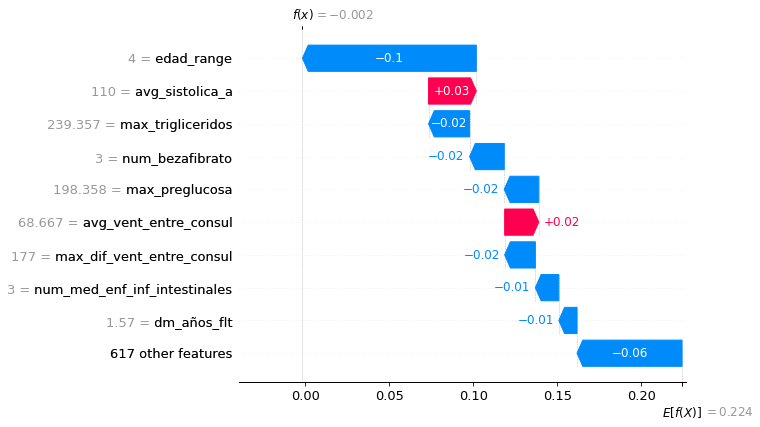

In [61]:
# train an XGBoost model
#X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

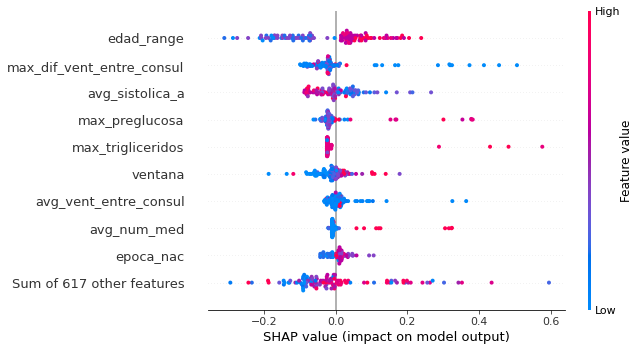

In [62]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

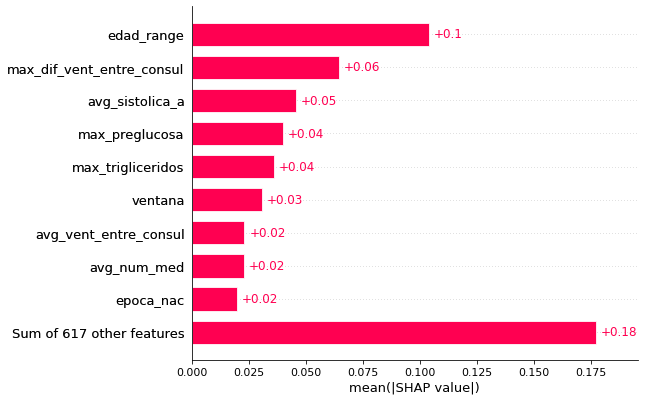

In [63]:
shap.plots.bar(shap_values)